<a href="https://colab.research.google.com/github/juniorjvn/BreadthFirstSearch/blob/main/bfs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Abstract
In this notebook we are going to implement a function that will search a graph using the Beadth First Search algorithm.<br>
bfs(graph, initial_state, goal_state)<br>
_Parameters_: 

- **graph** - Undirected Graph, weighted edges will be omitted
- **initial_state** - The starting node
- **goal_state** - The node we want to find(goal node)

_Returns_:
- A list of nodes in the exact order in which they were visited.
  If the goal_state node is not found, it will return an empty list(False).

## Setup and Imports
In order to run this notebook you will need to install the following modules.
- networkx
- matplotlib

### Install NetworkX
Run the following command from your terminal:<br>
`pip install networkx`
### Install Matplotlib
Run the following command from your terminal:<br>
`pip install matplotlib`

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

We will start by implementing two simple functions:<br>
draw_graph() - function that will help us draw our network.<br>
set_node_colors() - function that will assign a color to every node in our graph.<br>
`initial_state = 'Light blue'`,
`goal_state = 'read'`,
`or 'Yellow otherwise`
                    

In [41]:
def draw_graph(G, draw = True):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G)
    labels = dict(zip(G.nodes, G.nodes))
    e_labels = nx.get_edge_attributes(G, 'weight')
    color_list = list(nx.get_node_attributes(G, 'color').values())
    
    if color_list:
        colors = color_list
    else:
        colors = ['yellow' for c in range(G.order())]
    
    if draw:
        nx.draw_networkx_nodes(G, pos, node_size=550, node_color=colors, edgecolors='gray', cmap=plt.cm.Reds_r)
        nx.draw_networkx_edges(G, pos, alpha=0.2)
        nx.draw_networkx_labels(G, pos, labels, font_size=12)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=e_labels)
    plt.show()
    
def set_node_colors(G, initial_state, goal_state):
    nodes = list(G.nodes)
    colors = {}
    for node in nodes:
        if node == initial_state:
            colors[node] = 'lightblue'
        elif node == goal_state:
            colors[node] = 'red'
        else:
            colors[node] = 'yellow'
    nx.set_node_attributes(G, colors, 'color')

Next, we will implement our Beadth First Search function, bfs(graph, initial_state, goal_test). It will start at the initial_state node and will stop and return a list of nodes in the exact order in which they were visited when it finds the goal_state. We will assume that nodes are visited in lexicographical order, when an arbitrary choice has to be made.
##### Time and Space complexity
   - Time:  $O(b^d)$
   - Space: $O(b^d)$

In [42]:
def bfs(graph, initial_state, goal_state):
    '''Breadth-first search
        time = O(b^d), space = O(b^d). Where d = depth, and b = # of children'''
    frontier_queue = [initial_state]
    explored = []
    while frontier_queue:
        state = frontier_queue.pop(0)
        explored.append(state)

        if goal_state == state:
            return explored

        all_neighbors = list(graph.neighbors(state))
        neighbors = [neighbor for neighbor in all_neighbors
                    if neighbor not in explored and neighbor not in frontier_queue]
        #neighbors are visited in order
        neighbors.sort()
        frontier_queue.extend(neighbors)
    #if bfs function fails to find gols state will return an empty list = False
    return []

Then, using the module Networkx, we will create the following network.
<img src="graph.png">

In [43]:
G = nx.Graph()
cities = ["Arad", "Zerind", "Timisoara", "Oradea", "Lugoj", "Mehadia", "Drobeta", "Sibiu",
         "RimnicuVilcea", "Fagaras", "Pitesti", "Giurgiu", "Bucharest", "Neamt", "Urziceni",
         "Iasi", "Vaslui", "Hirsova", "Eforie", "Craiova"]
edges = [("Arad","Zerind" , 75), ("Arad","Timisoara" , 118), ("Arad", "Sibiu", 140),
         ("Zerind", "Oradea", 71),("Timisoara", "Lugoj", 111), ("Lugoj", "Mehadia", 70),
         ("Mehadia", "Drobeta", 75), ("Drobeta", "Craiova", 120), ("Oradea", "Sibiu", 151),
         ("Sibiu", "RimnicuVilcea", 80), ("Sibiu", "Fagaras", 99), ("RimnicuVilcea", "Pitesti", 97),
         ("RimnicuVilcea", "Craiova", 146), ("Craiova", "Pitesti", 138), ("Pitesti", "Bucharest", 101),
         ("Bucharest", "Fagaras", 211), ("Bucharest", "Giurgiu", 90), ("Bucharest", "Urziceni", 85),
         ("Urziceni", "Vaslui", 142), ("Vaslui", "Iasi", 92), ("Iasi", "Neamt", 87),
         ("Urziceni", "Hirsova", 98), ("Hirsova", "Eforie", 86)]
G.add_nodes_from(cities)
G.add_weighted_edges_from(edges)


Now, we will display our graph. Our graph may look a little different but node labels and edge values between nodes should match.

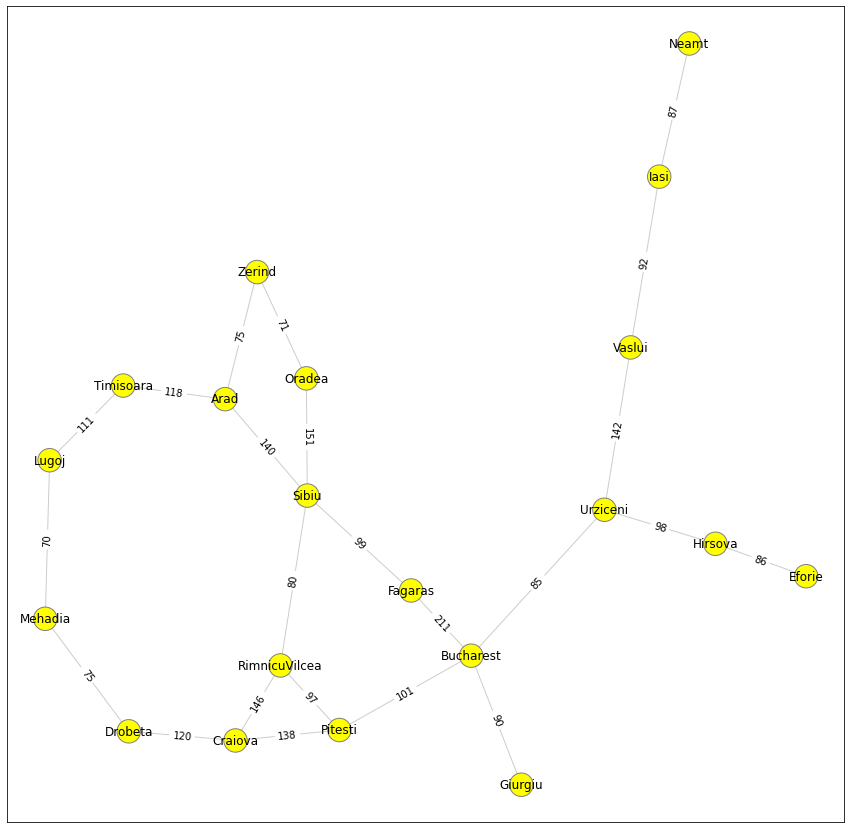

In [46]:
draw_graph(G)

Finally, we will use the function bfs() to display the list of cities visited, if we breadth-first search for 'Bucharest', starting from 'Arad'

Success!!
Visited Cities:
['Arad', 'Sibiu', 'Timisoara', 'Zerind', 'Fagaras', 'Oradea', 'RimnicuVilcea', 'Lugoj', 'Bucharest']


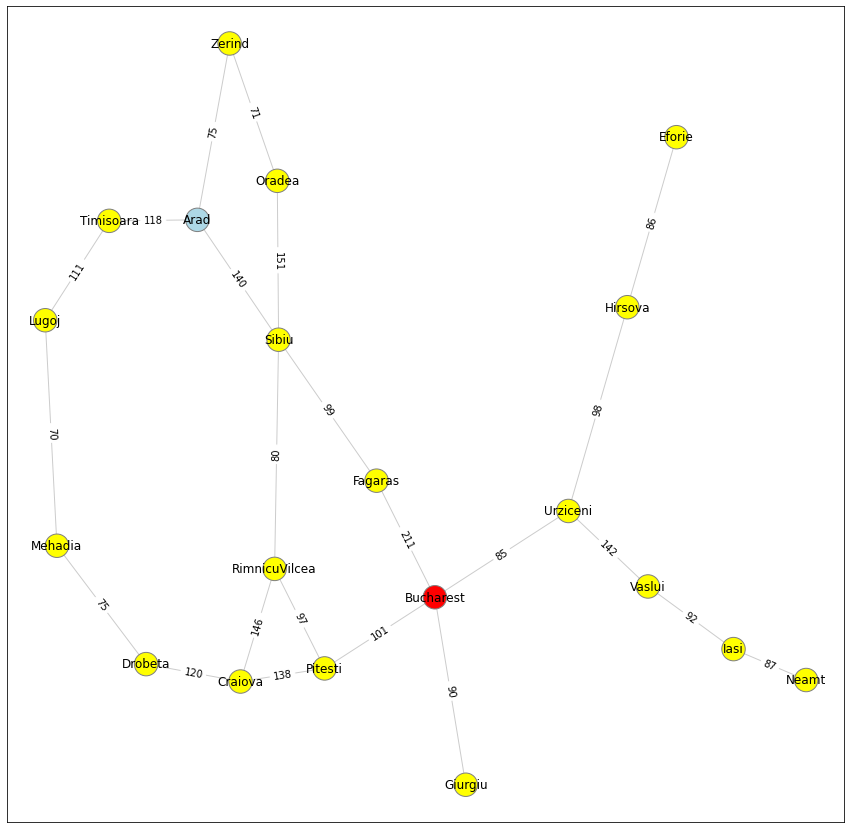

In [39]:
initial_state = 'Arad'
goal_state = 'Bucharest'
explored = bfs(G, initial_state, goal_state)


if explored:
    print("Success!!")
    print("Visited Cities:")
    print(explored)
    set_node_colors(G, initial_state, goal_state)
    draw_graph(G)
else:
    print("Failure!!")
    print('The city was not found')



<img src="meme.jpeg">

<blockquote>Depth-first search and Uniform-cost search coming next</blockquote>